In [1]:
import xarray as xr
import os 
import numpy as np
import matplotlib.pyplot as plt


In [2]:
pwd

'/home/tarandeepk/Desktop/adcirc/all_cases/Flux_check/cases_check/culvert_20by1by5_invert2m'

In [3]:
file_path = "fort.63.nc"

# Variable to plot (modify as needed)
var_name = "zeta"  # Example: water surface elevation
from netCDF4 import Dataset

# Open the NetCDF file
nc = Dataset(file_path, "r")
print(nc)
# Get variable data


# Get lon/lat coordinates (assuming they exist as 'lon' and 'lat' variables)
lon = nc.variables["x"][:]
lat = nc.variables["y"][:]
time_1d = nc.variables["time"][:]
# Get variable data
var = nc.variables[var_name][:]
depth =nc.variables["depth"][:]

# Close the NetCDF file
nc.close()



<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    _FillValue: -99999.0
    model: ADCIRC
    version: e98c963
    grid_type: Triangular
    description: test                                         ! 32 CHARACTER ALPHANUMERIC RUN DES
    agrid: test
    rundes: test                                         ! 32 CHARACTER ALPHANUMERIC RUN DES
    runid: test                                         ! 24 CHARACTER ALPHANUMERIC RUN IDE
    title: ADCIRC Test Suite
    institution: ADCIRC
    source: CircleCI
    history: NONE
    references: ADCIRC.org
    comments: NONE
    host: Github
    convention: CF3
    Conventions: UGRID-0.9.0
    contact: github.com/adcirc
    creation_date: 2024-06-17 11:31:20 -04:00
    modification_date: 2024-06-17 11:31:20 -04:00
    fort.15: ==== Input File Parameters (below) ====
    dt: 0.1
    ihot: 0
    ics: 1
    nolibf: 1
    nolifa: 2
    nolica: 1
    nolicat: 1
    nwp: 0
    ncor: 0
    ntip: 0
   

In [4]:
print(np.shape(var))
nt = len(time_1d)
print(nt)


(37519, 1309)
37519


In [5]:
print(np.floor(18355/55))
print(55*333)
print()
print(time_1d[-1])

dt = 55
nt = 18315
node11 = 747
node22 = 649
count = 0
for i in range(0, nt, dt):
    
    time = count*dt*6 # Each output at 60 timesteps and model dt is 0.1 seconds 
    count = count+1

print('time in days')
#print(time[-1]/86400)
print(time/86400)
print(count)
print(i)
print(18260*6/86400)


333.0
18315

225114.0
time in days
1.2680555555555555
333
18260
1.2680555555555555


/tmp/ipykernel_50860/1939128121.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(14,10))


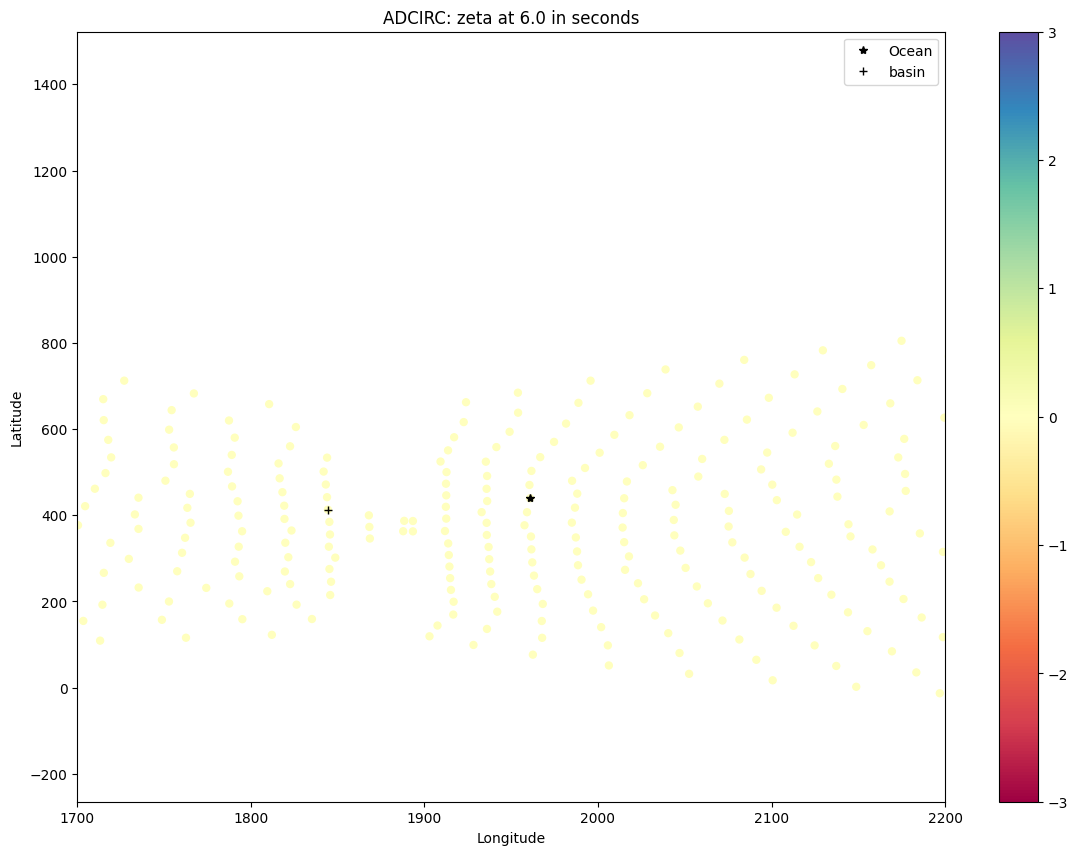

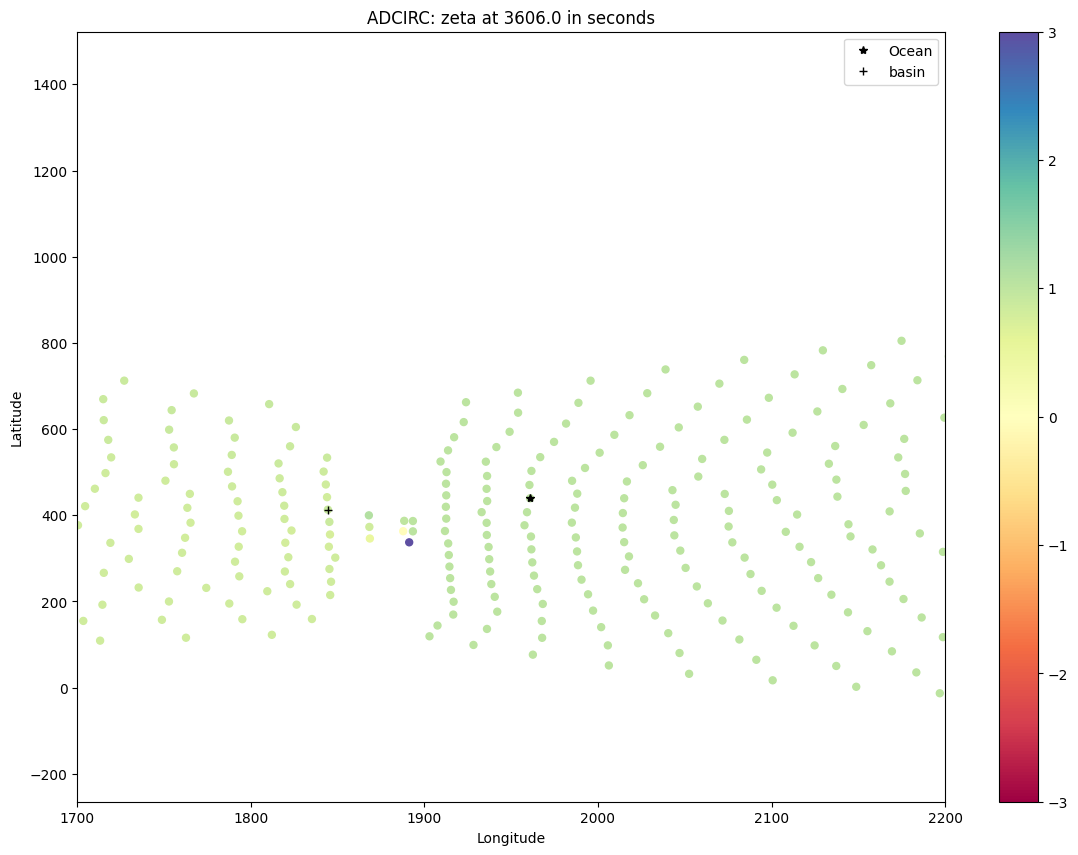

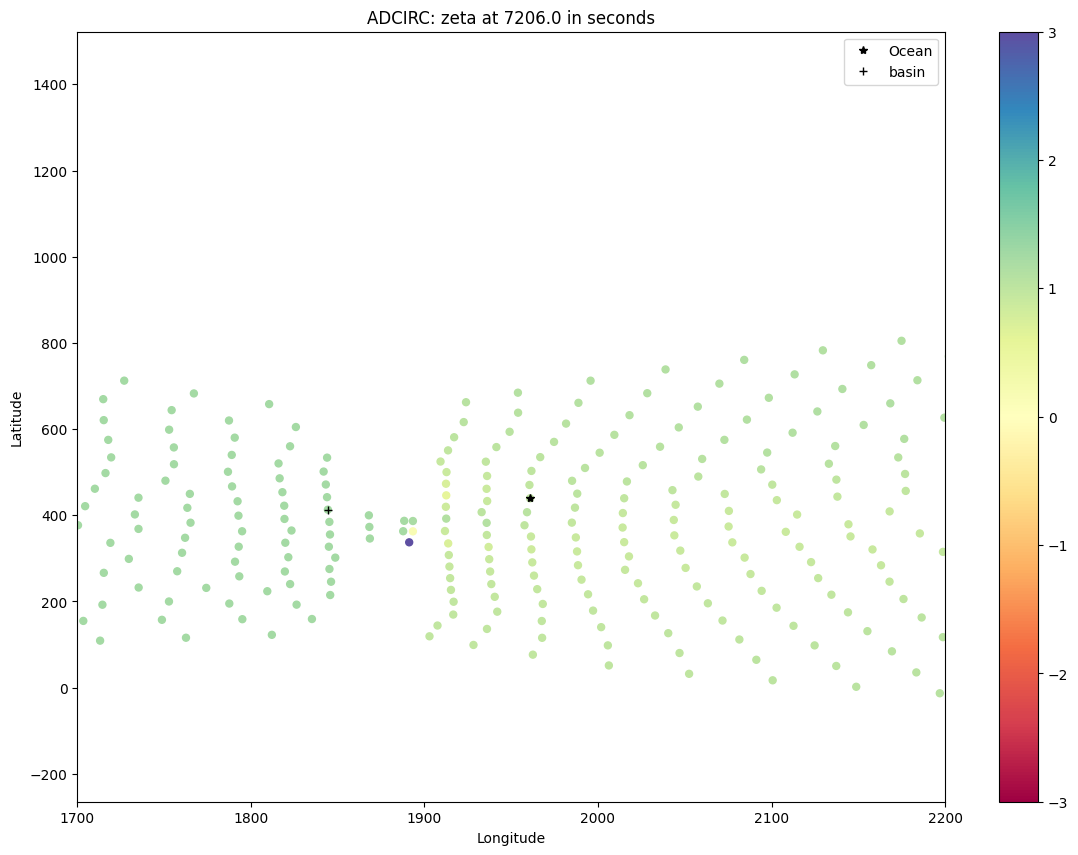

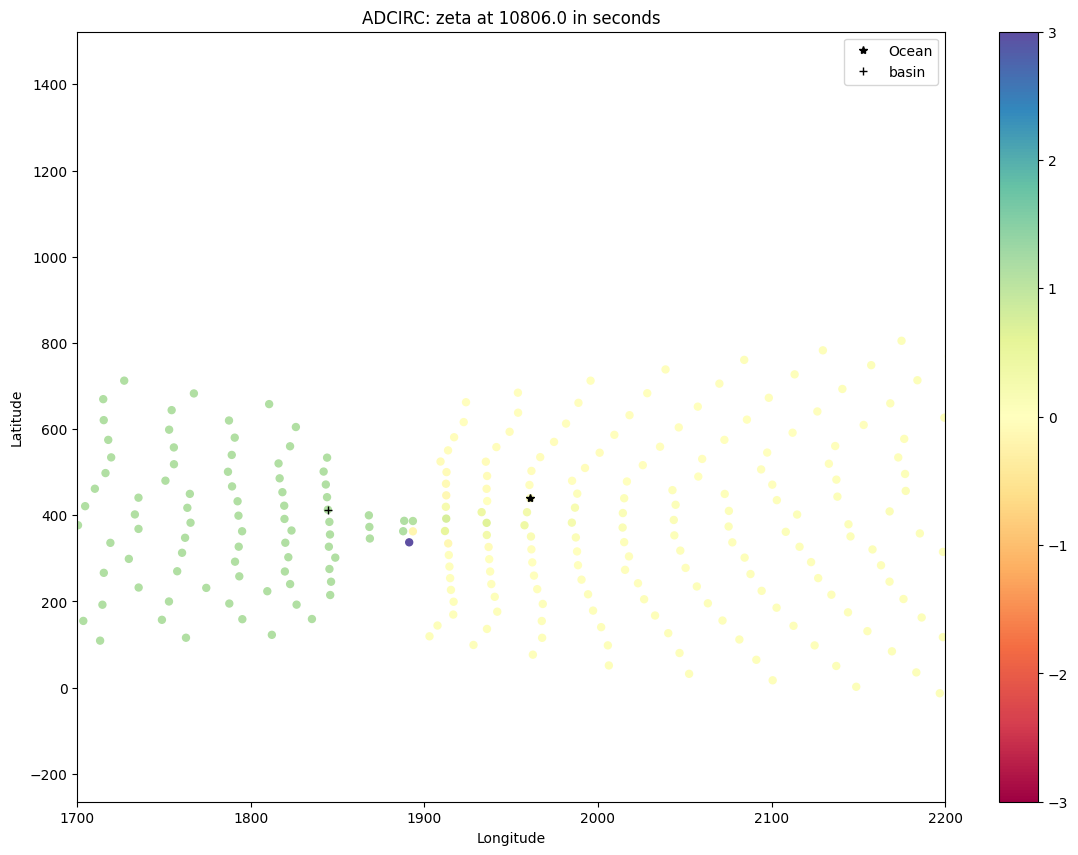

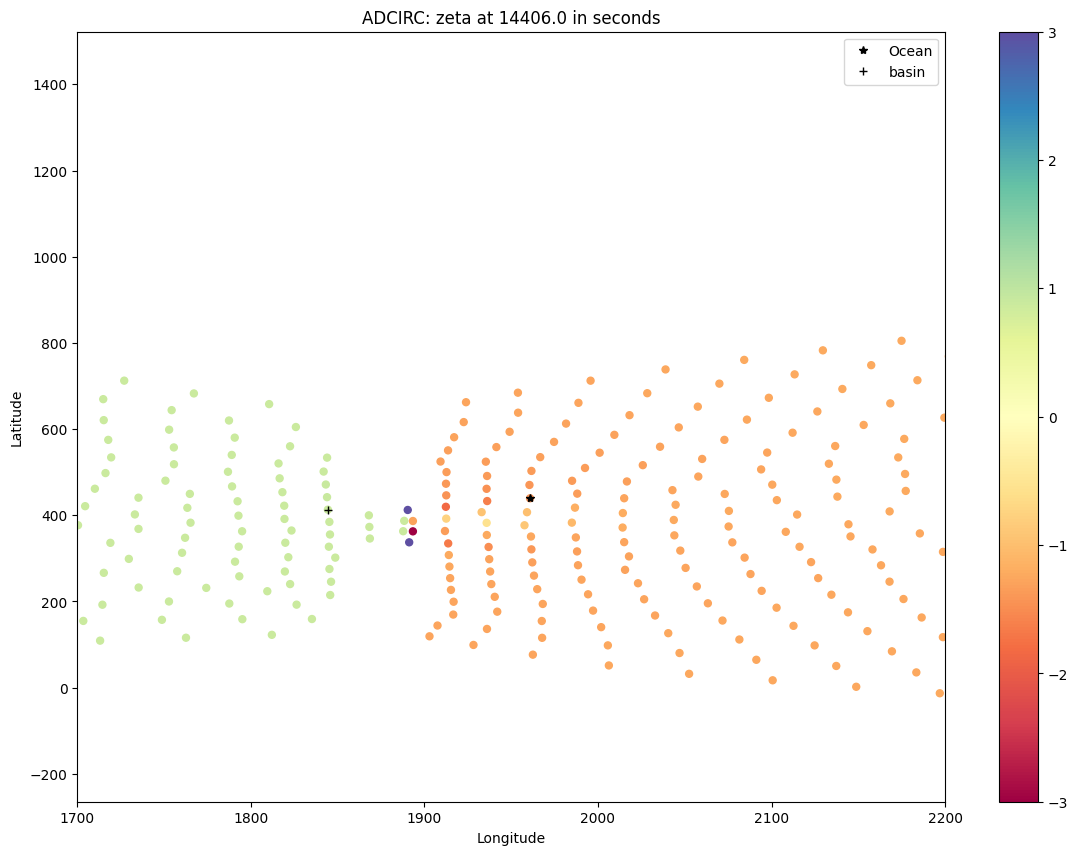

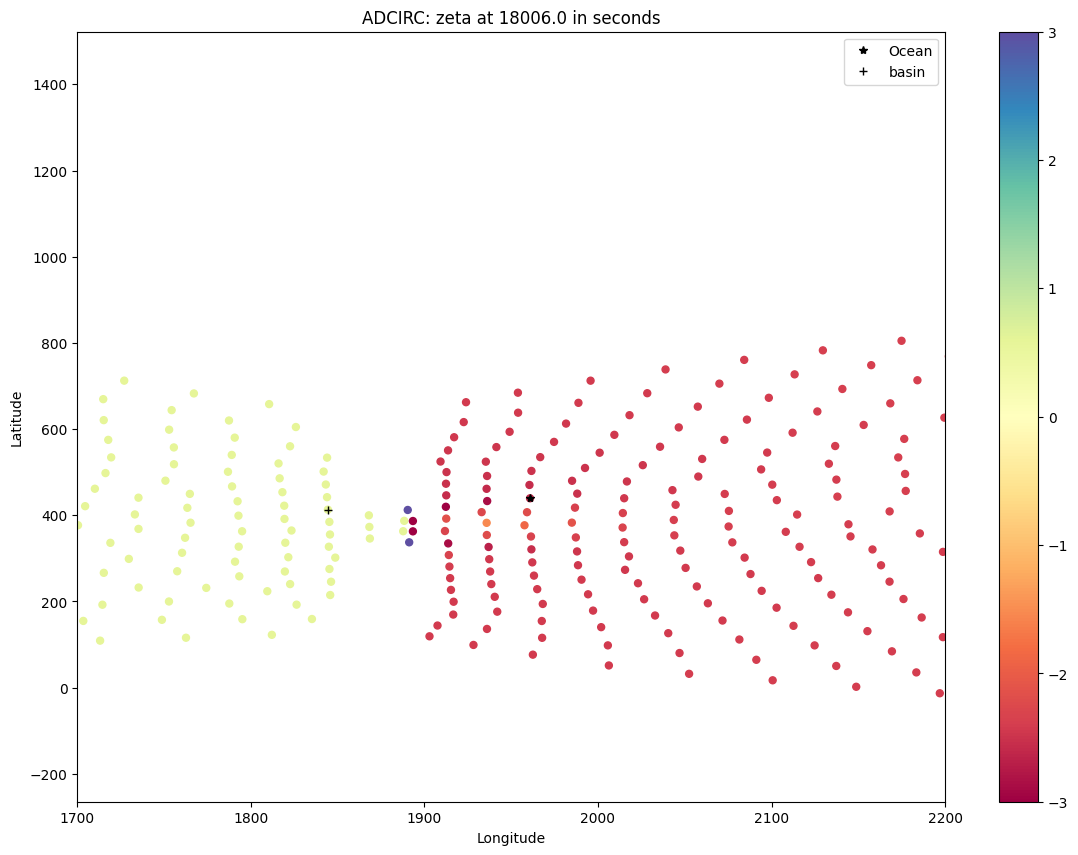

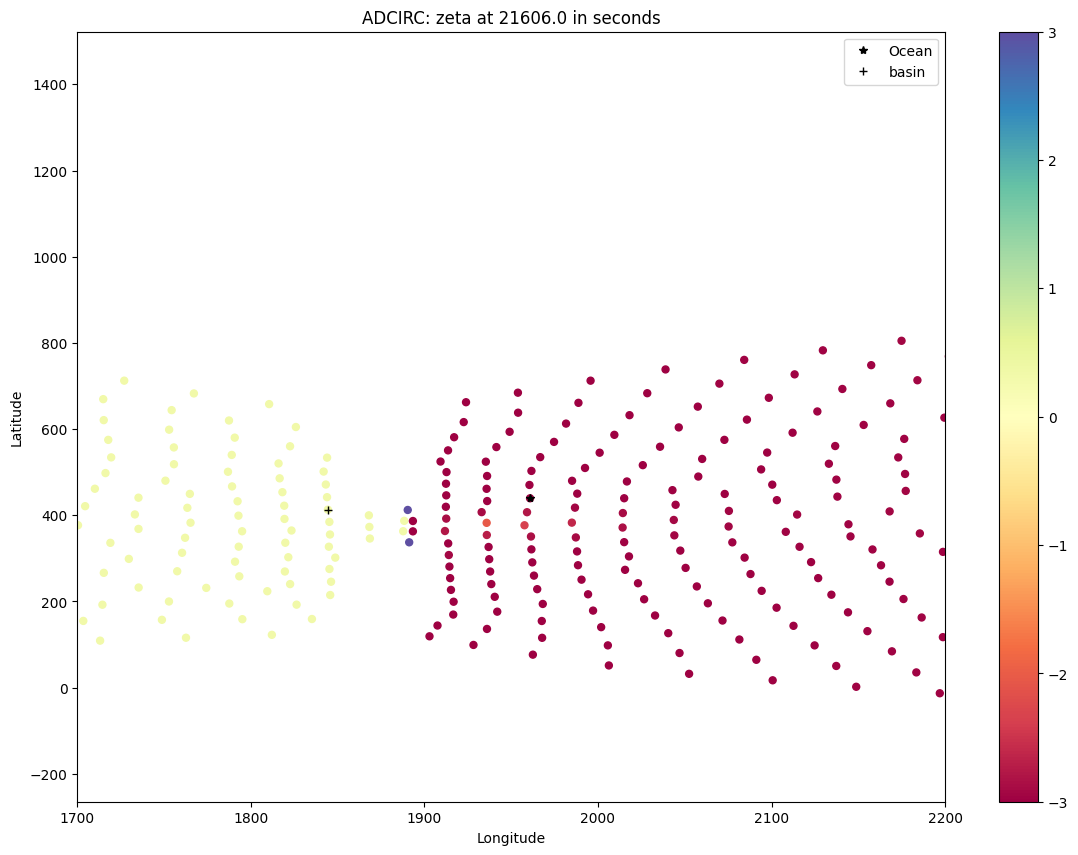

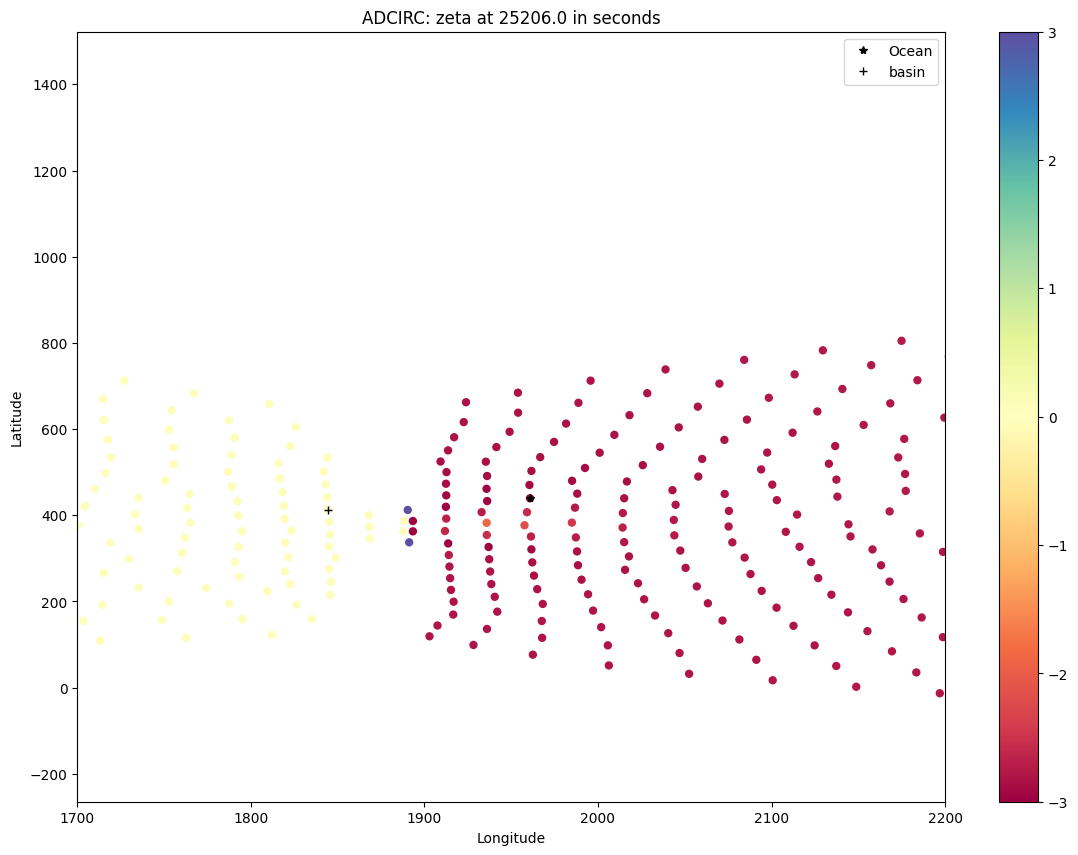

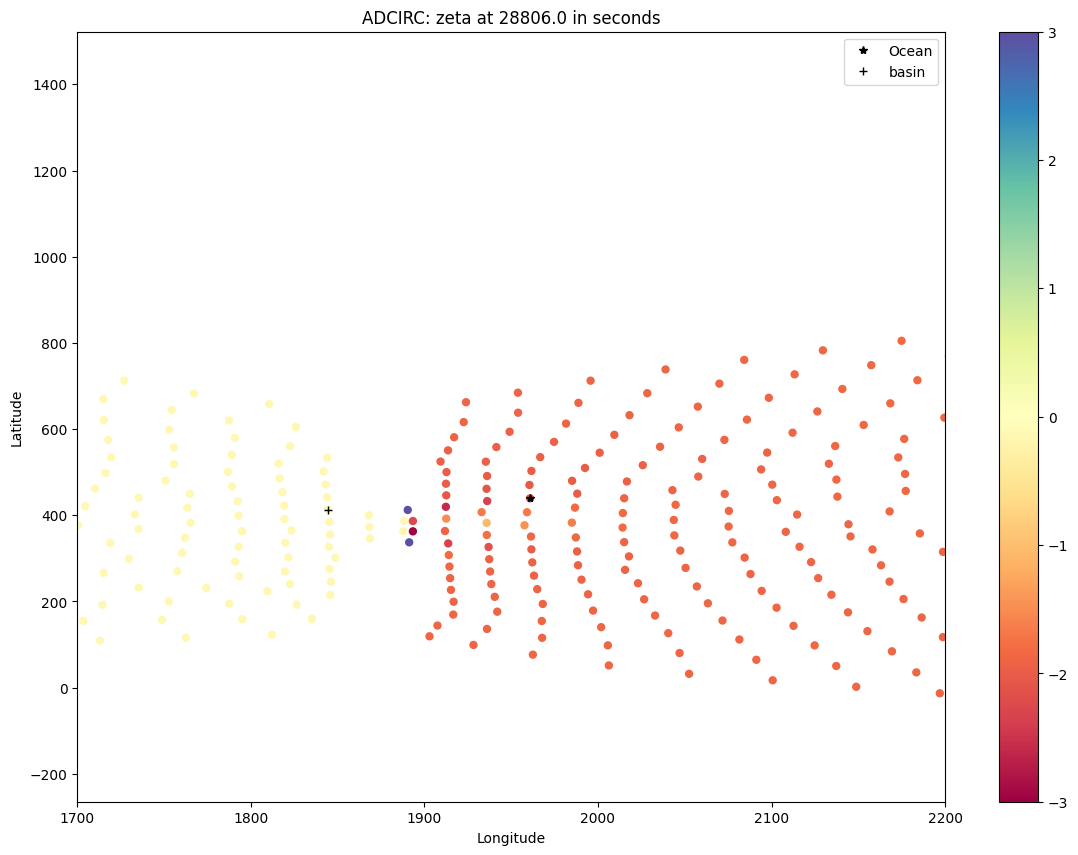

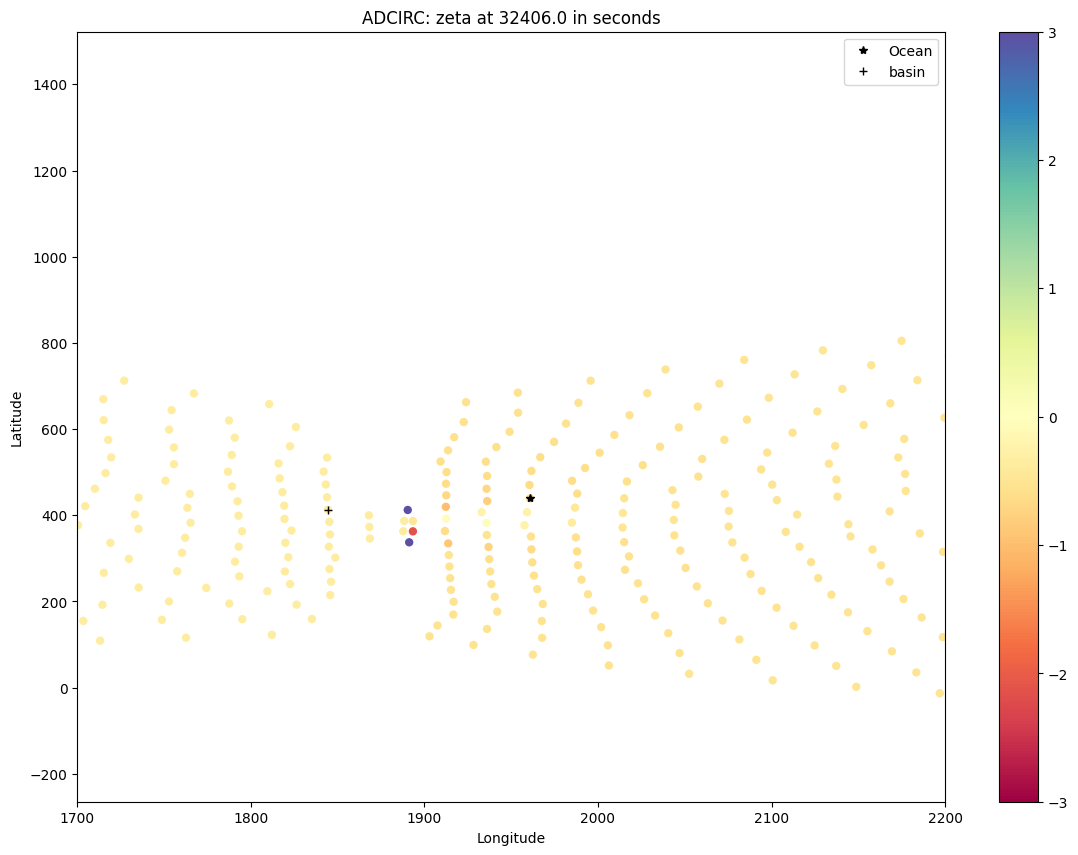

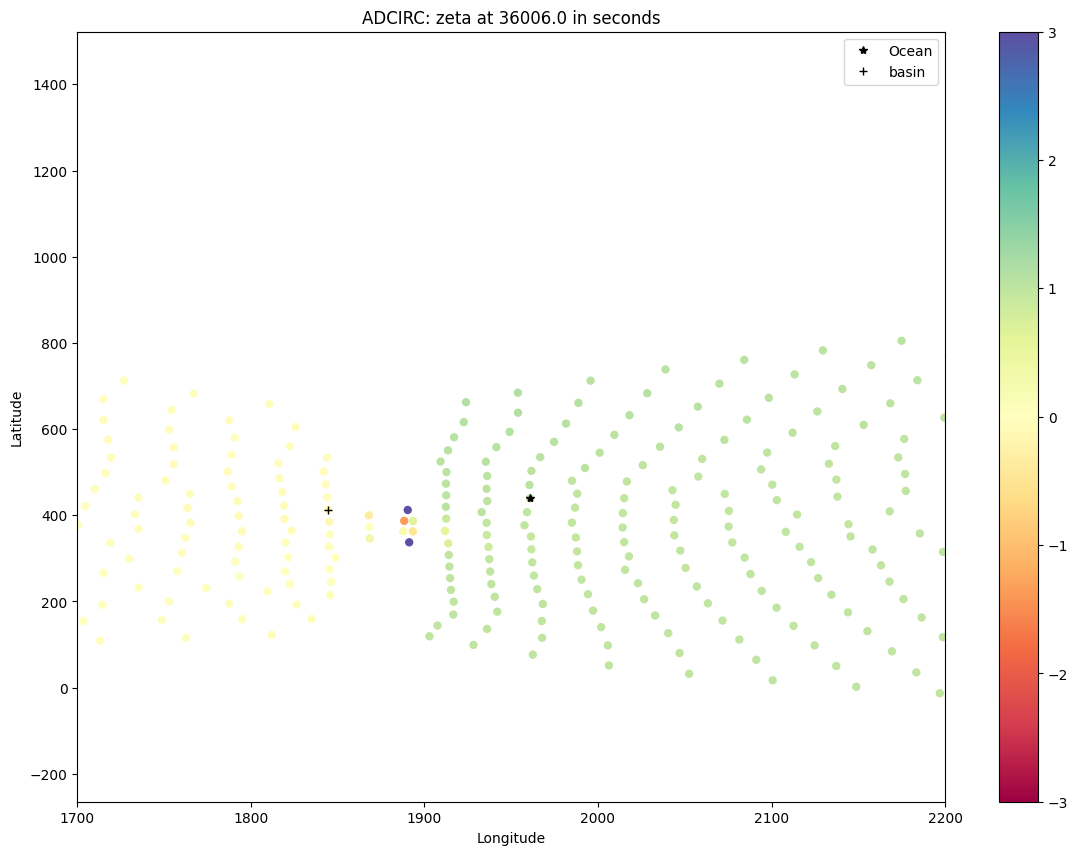

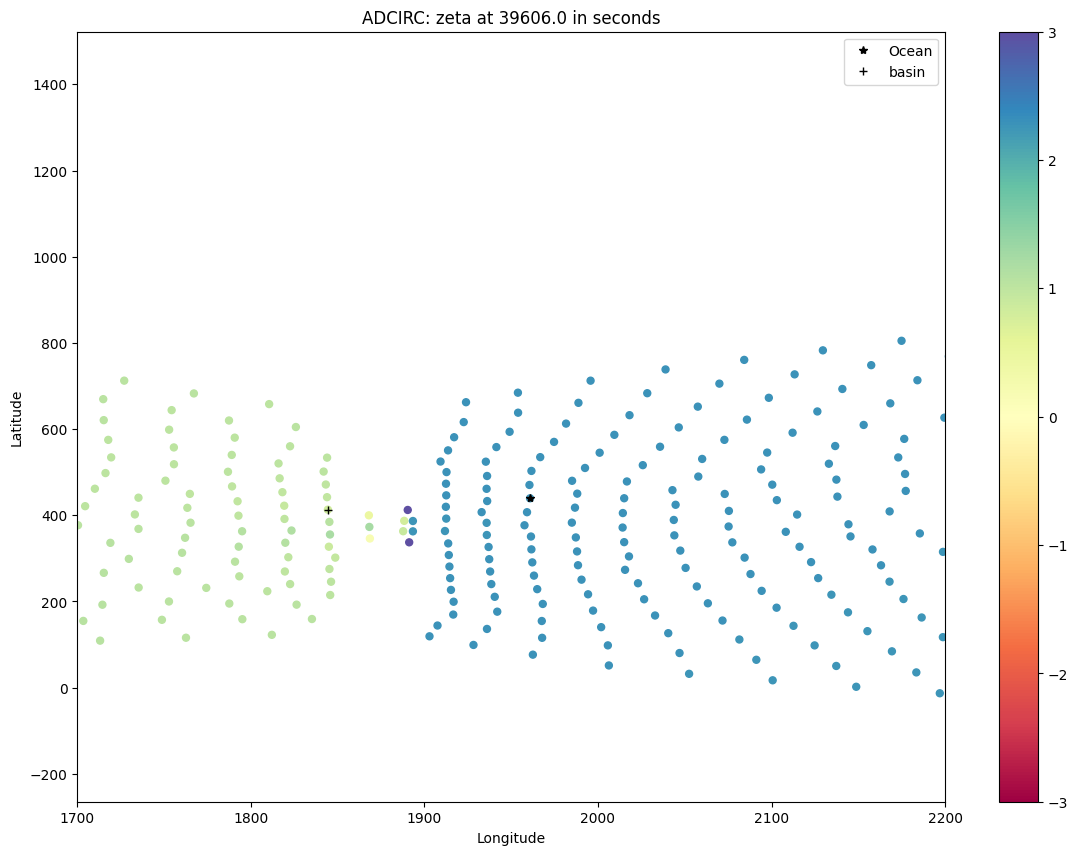

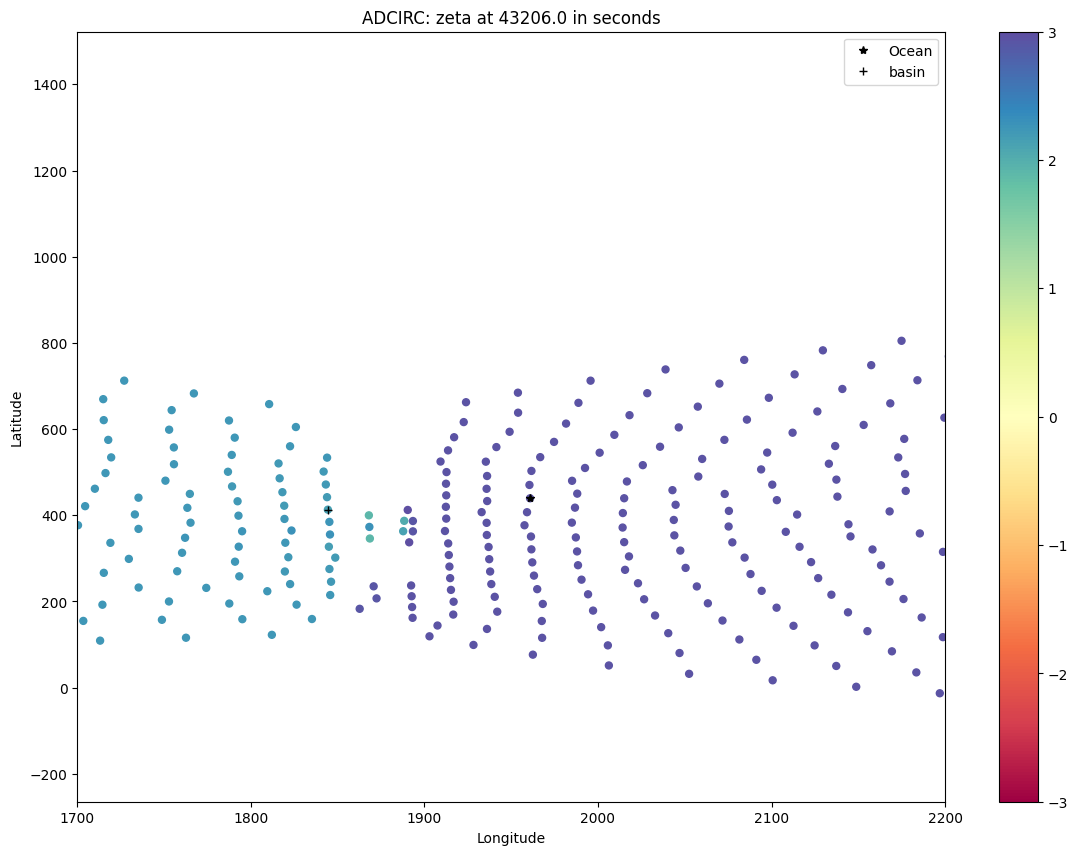

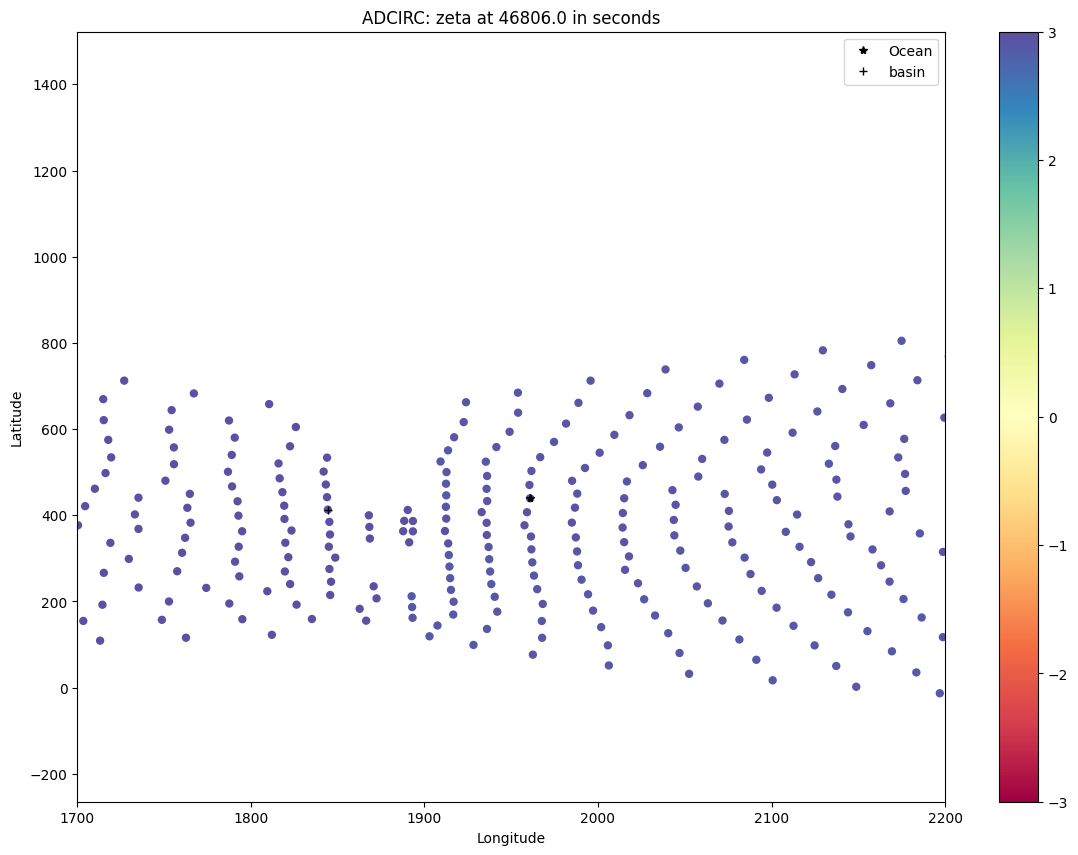

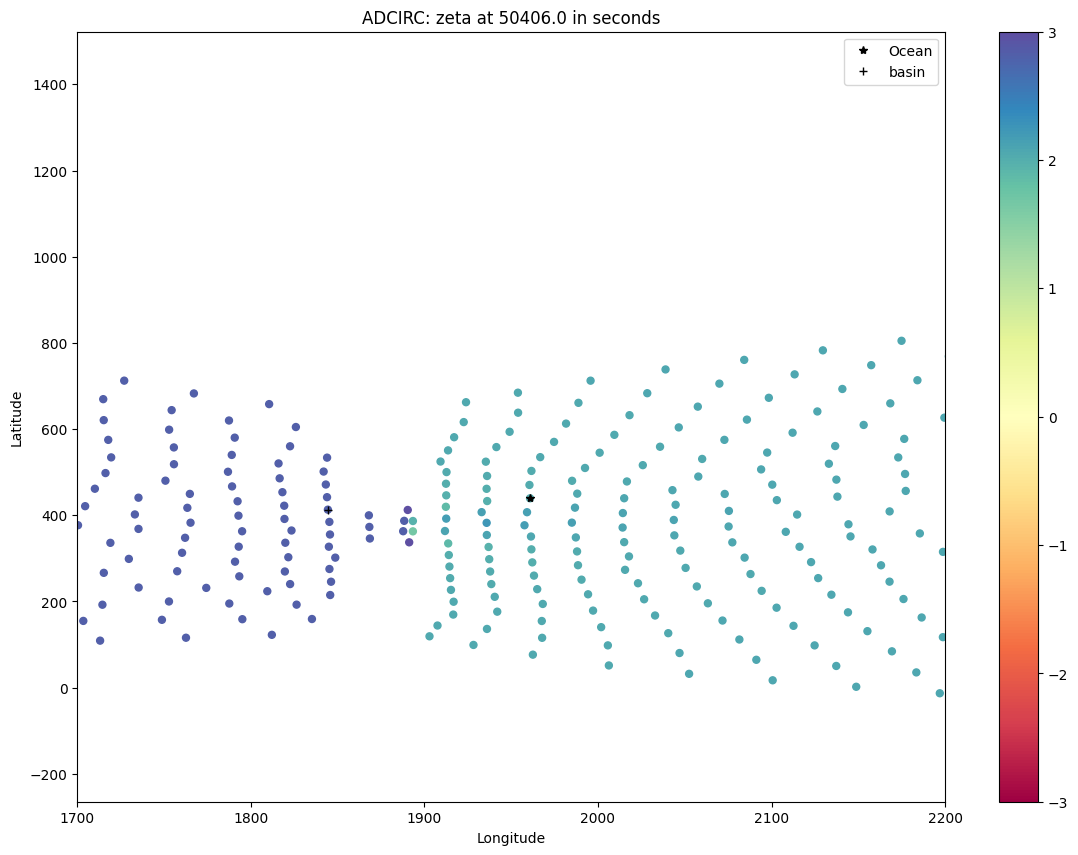

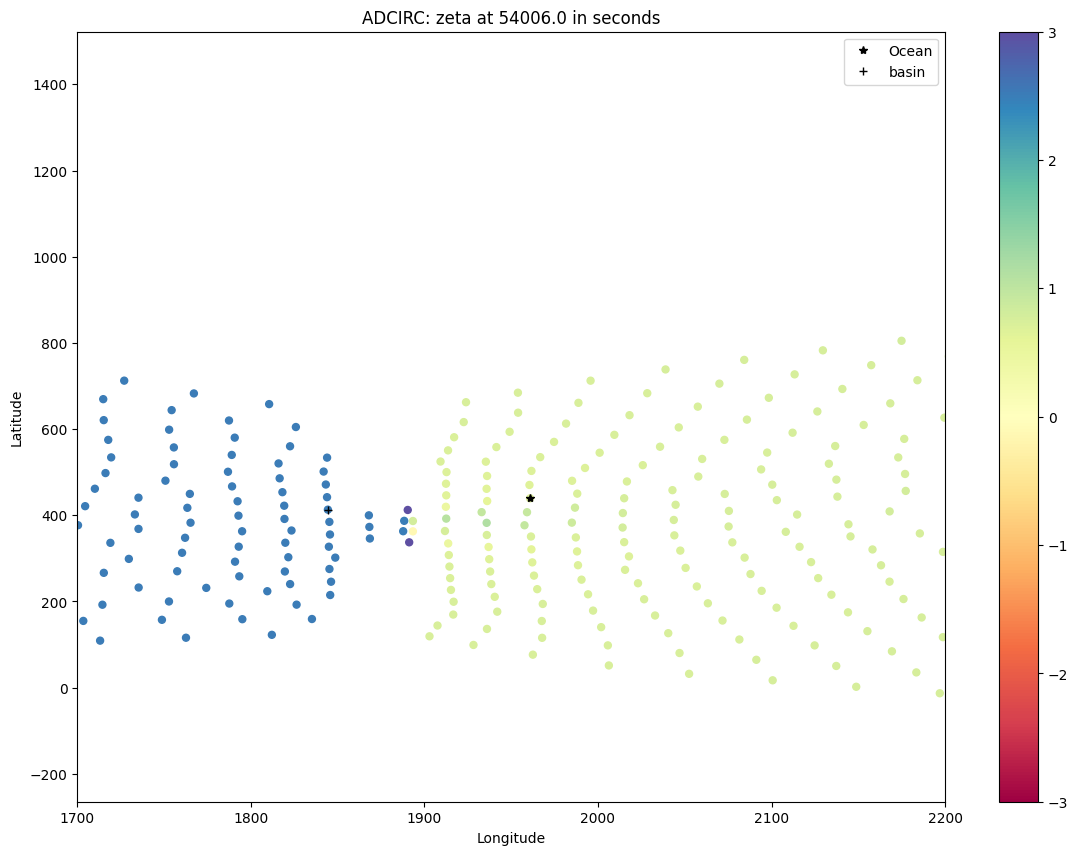

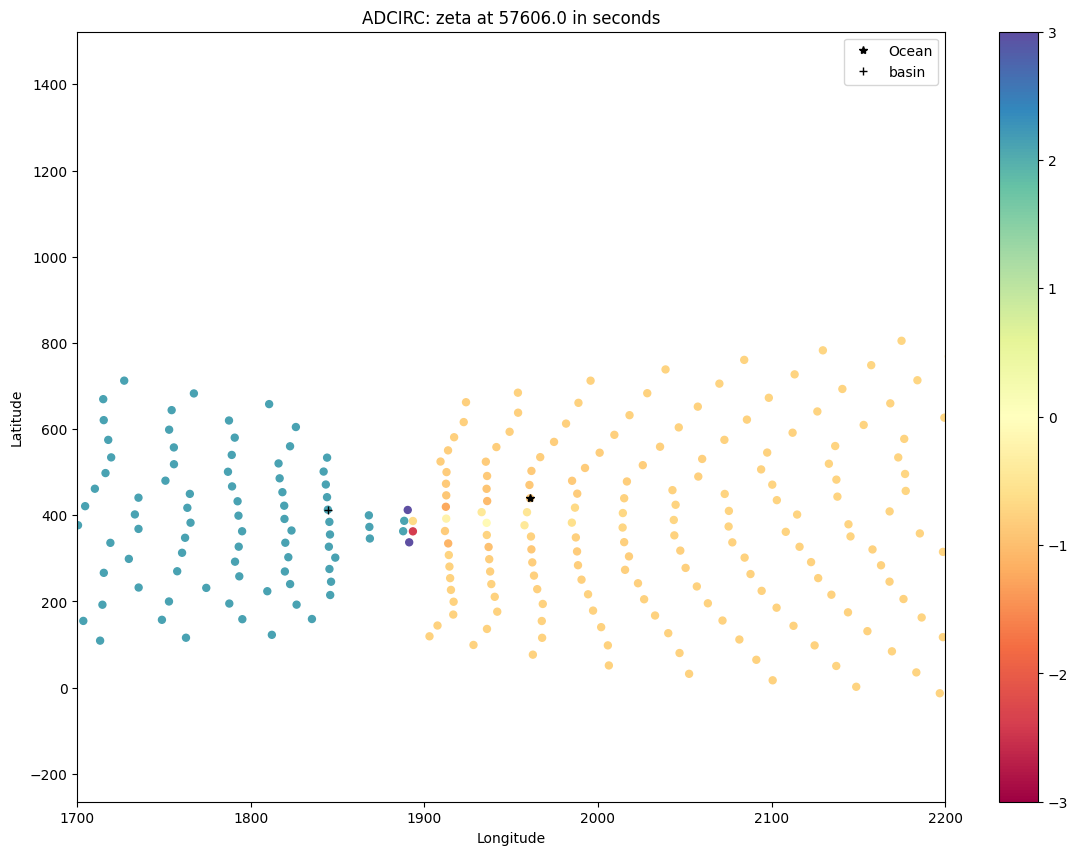

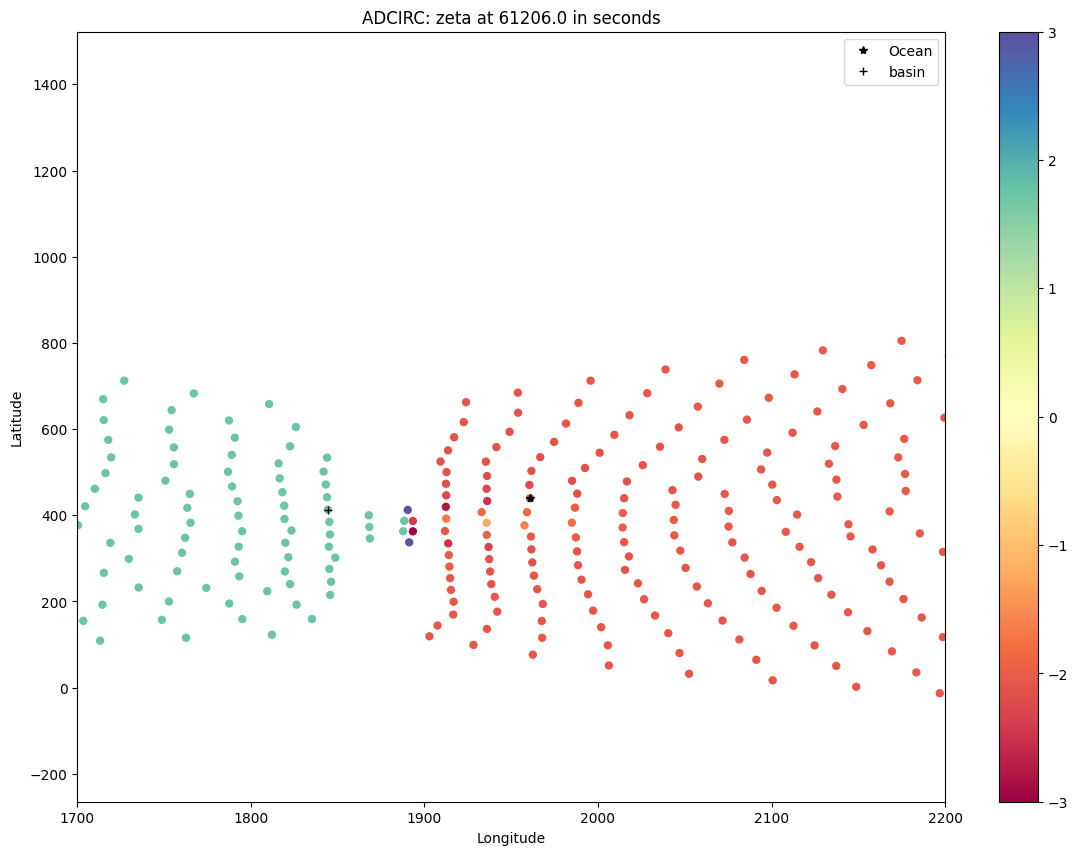

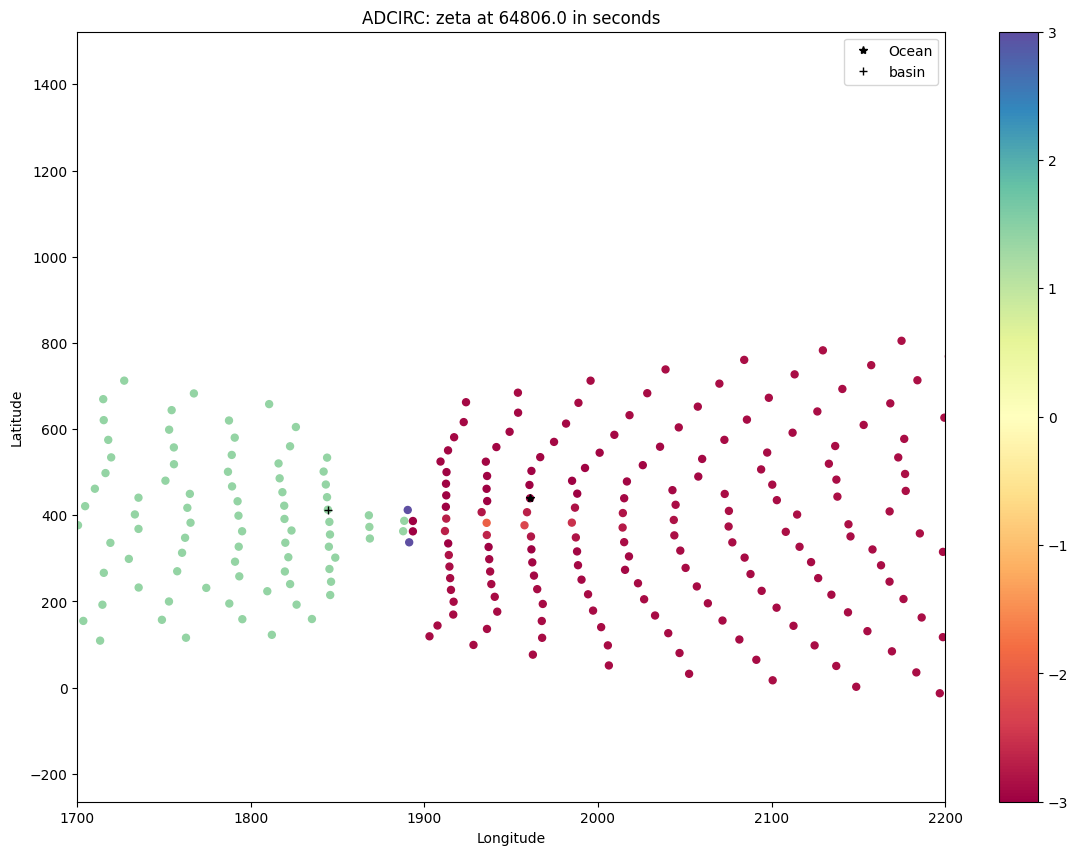

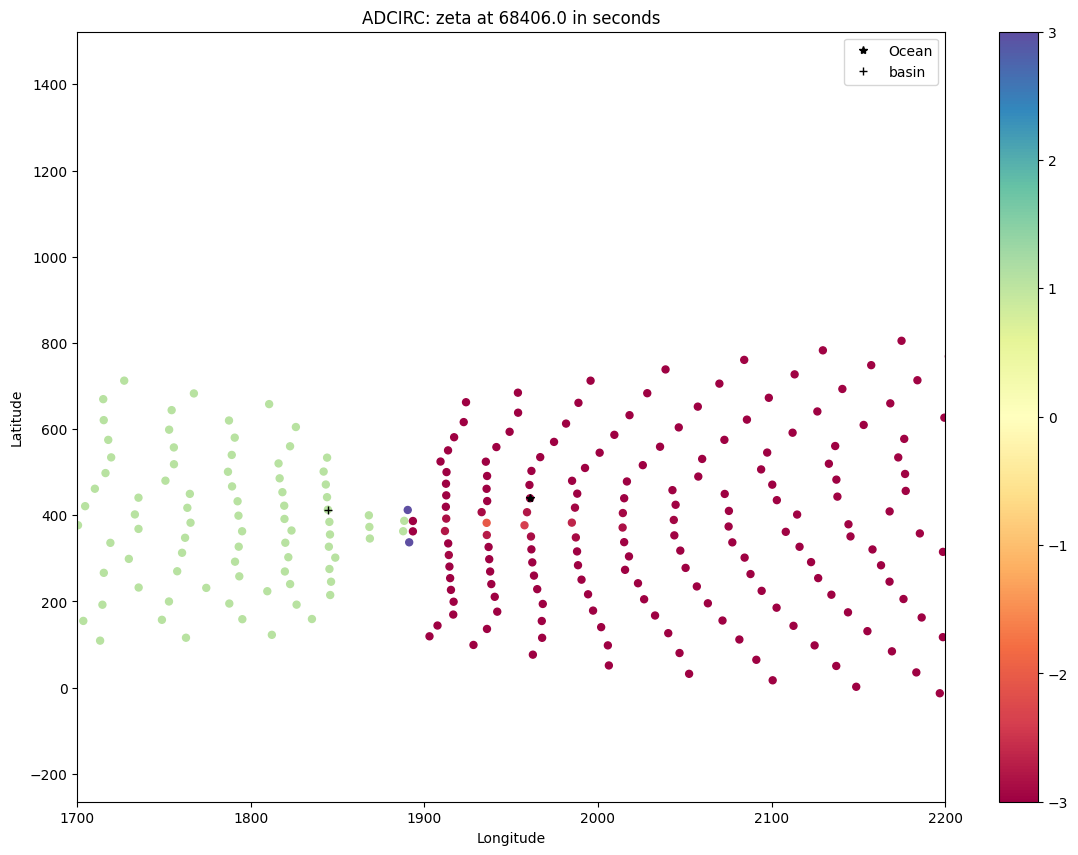

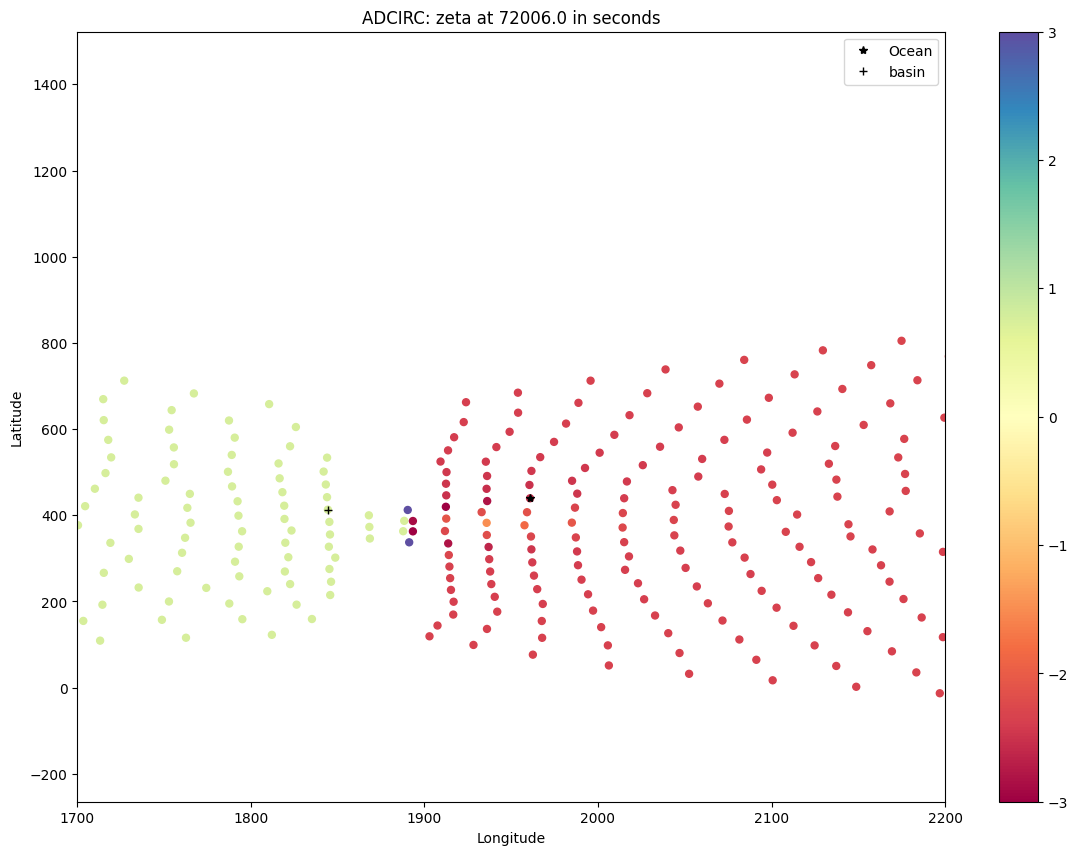

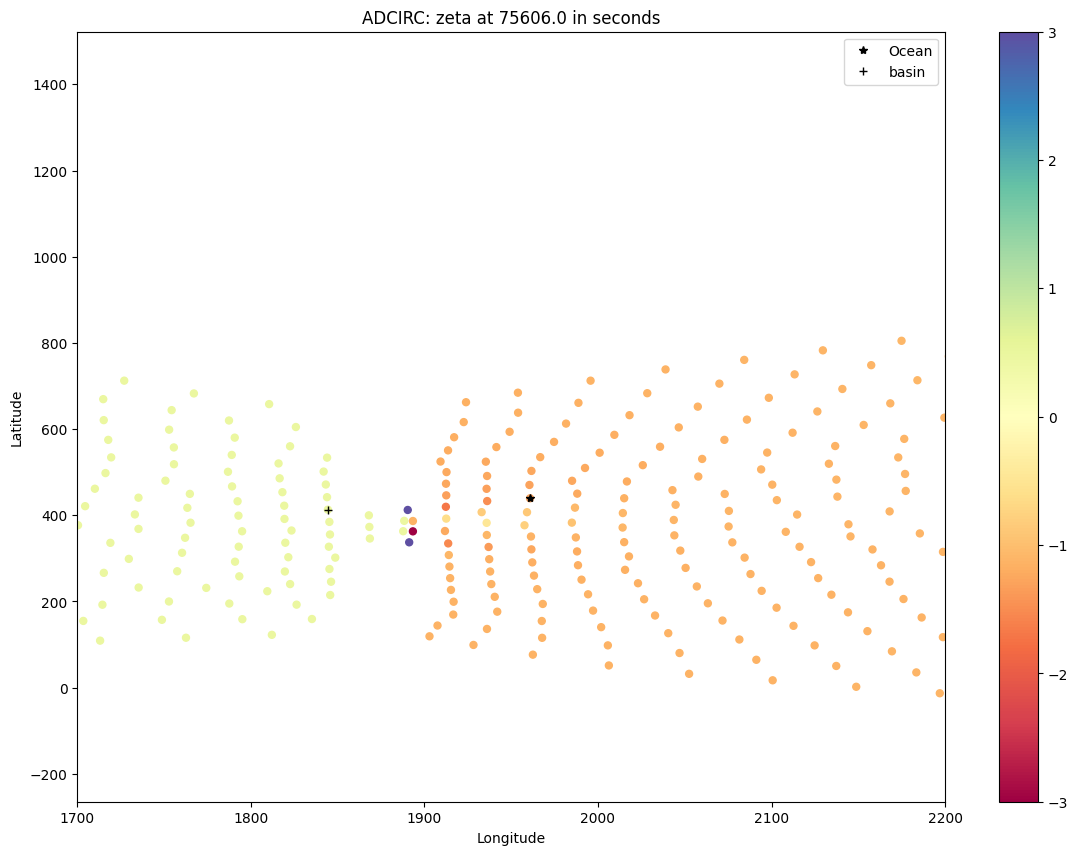

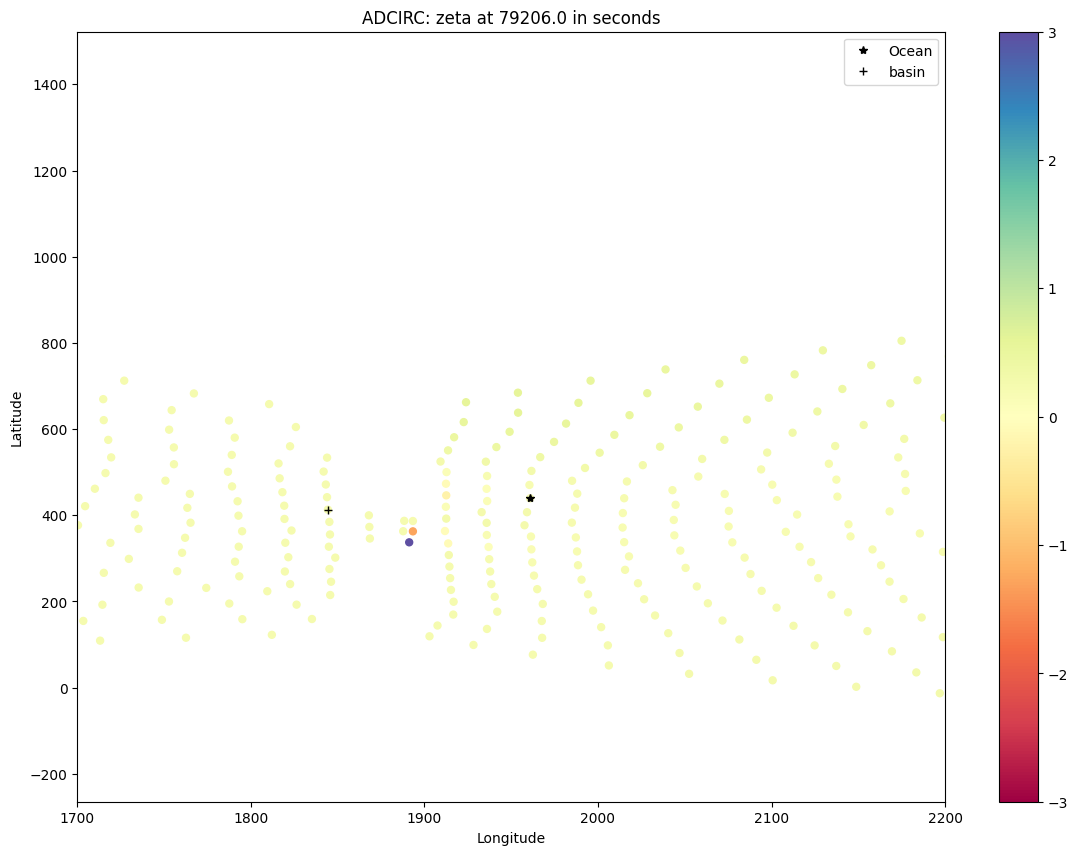

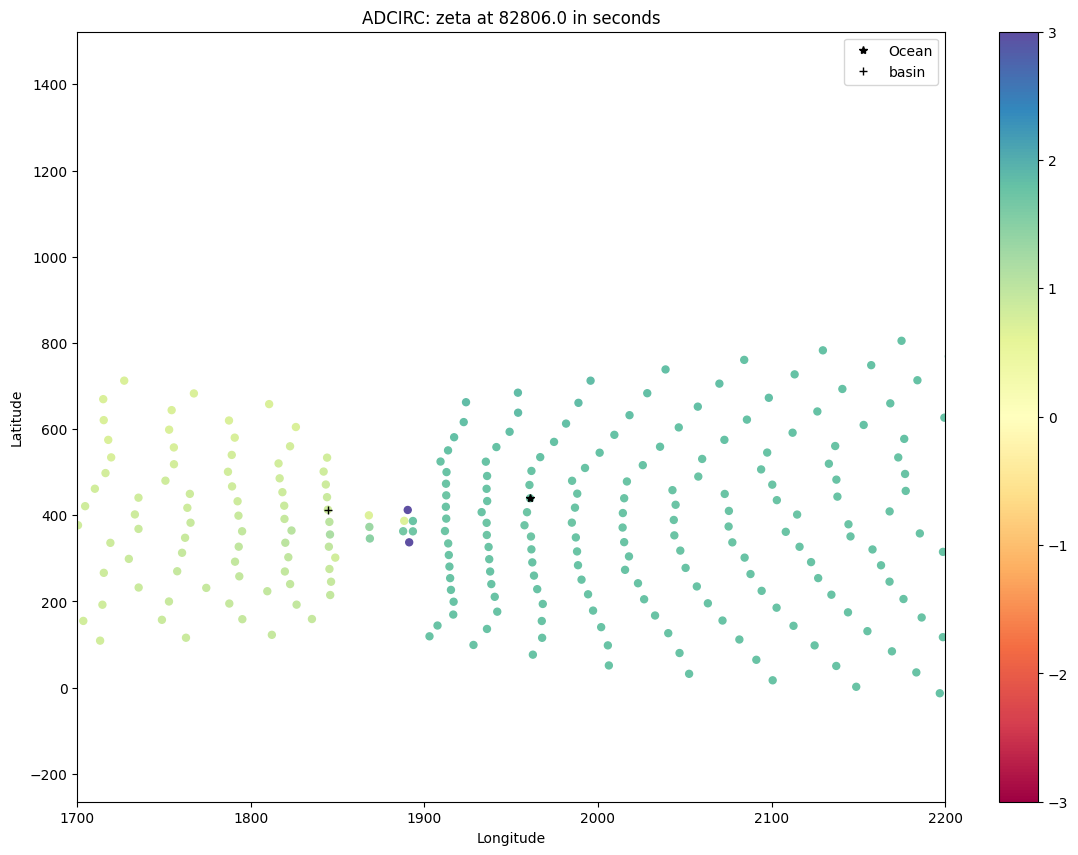

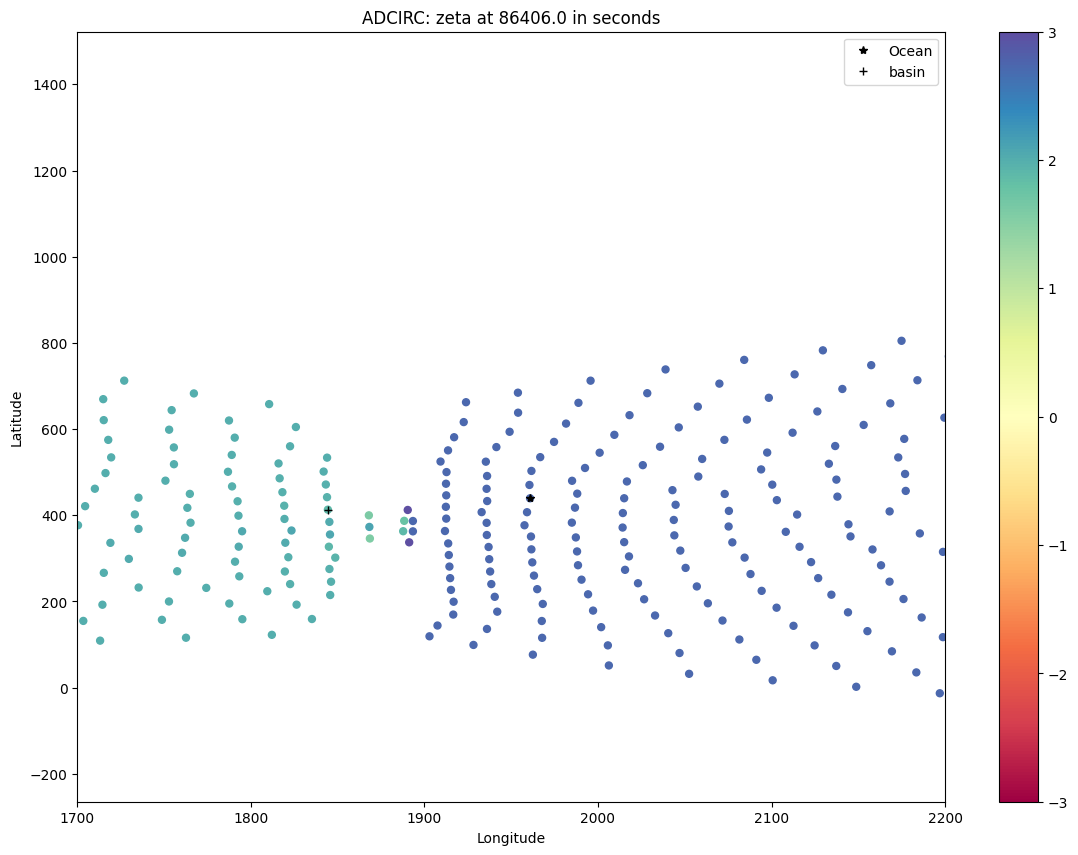

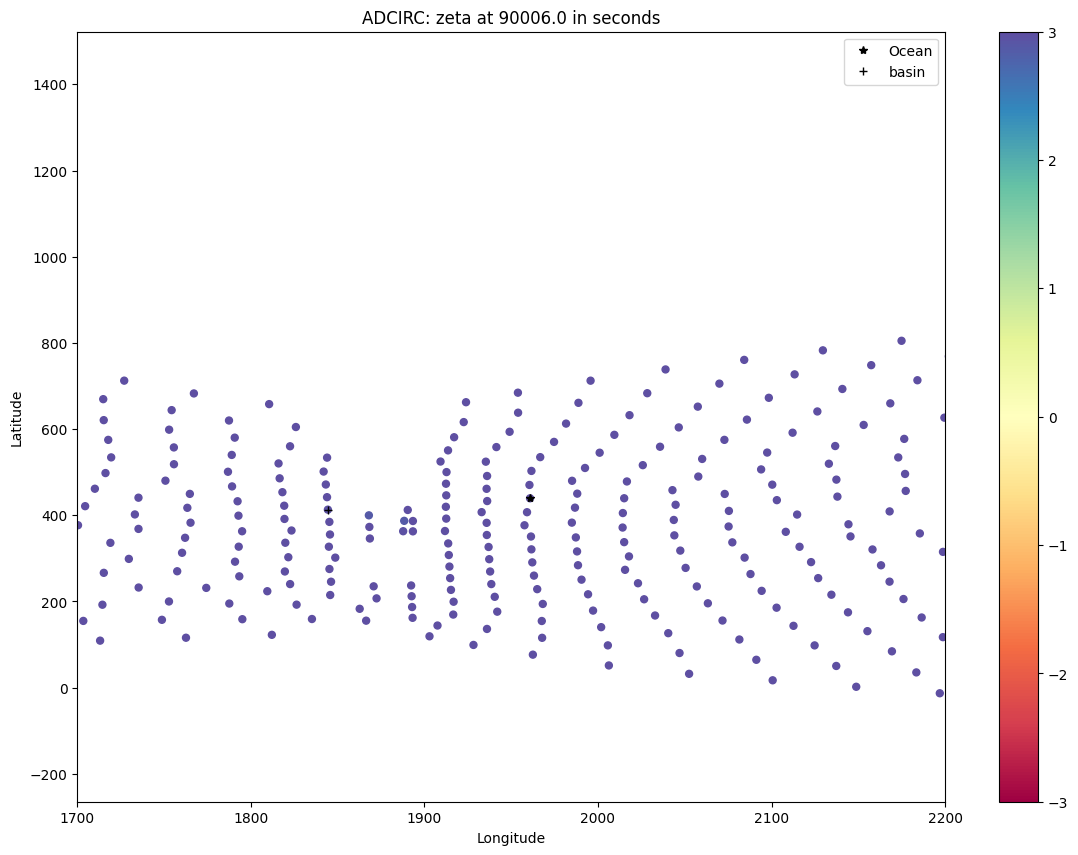

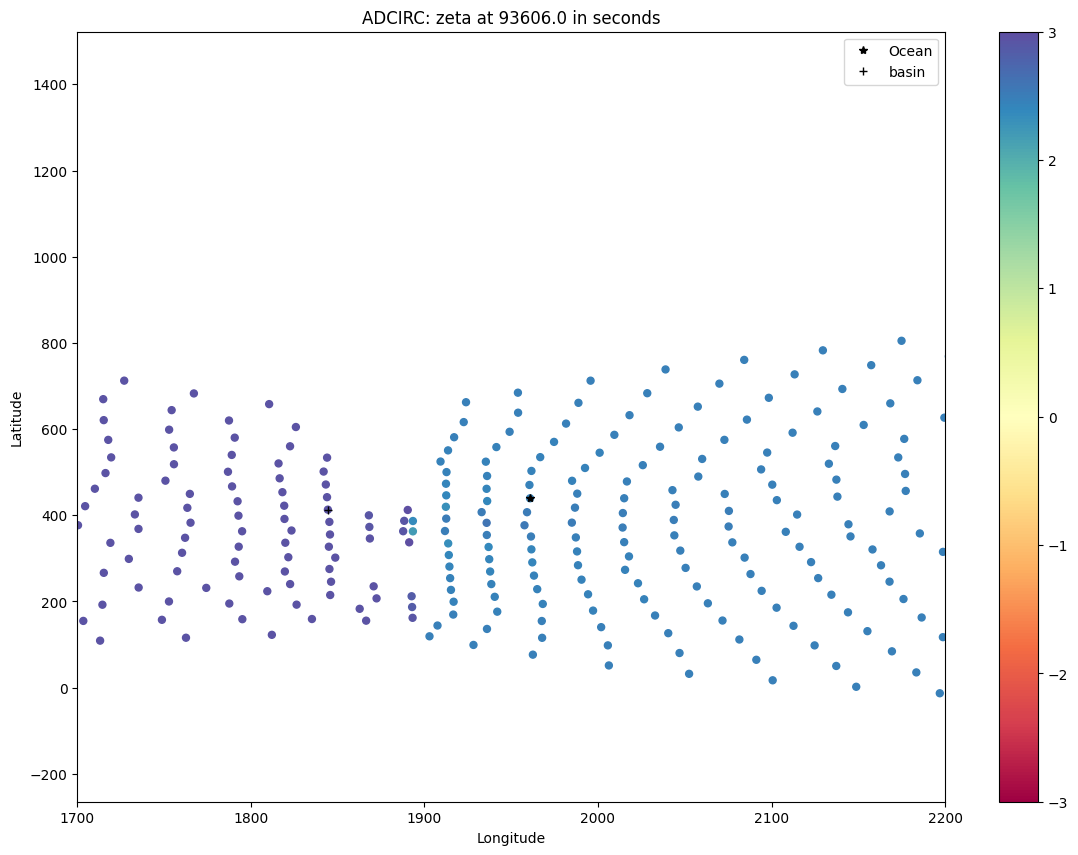

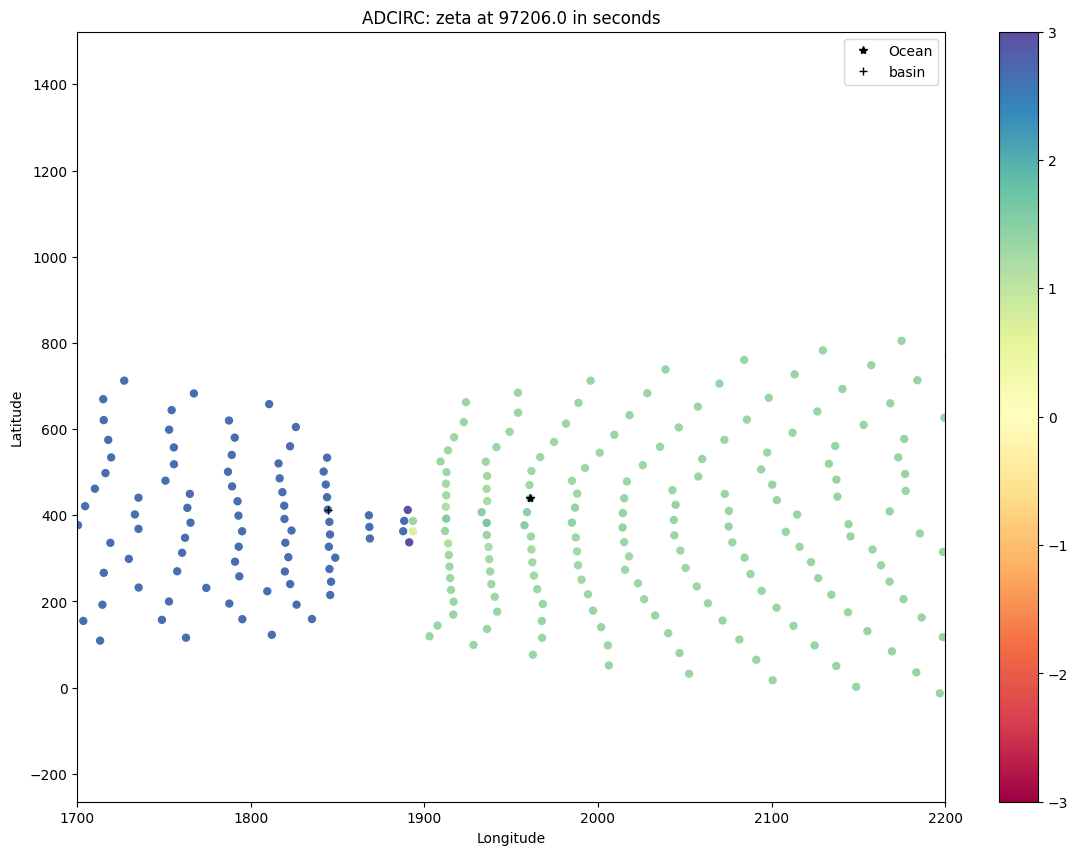

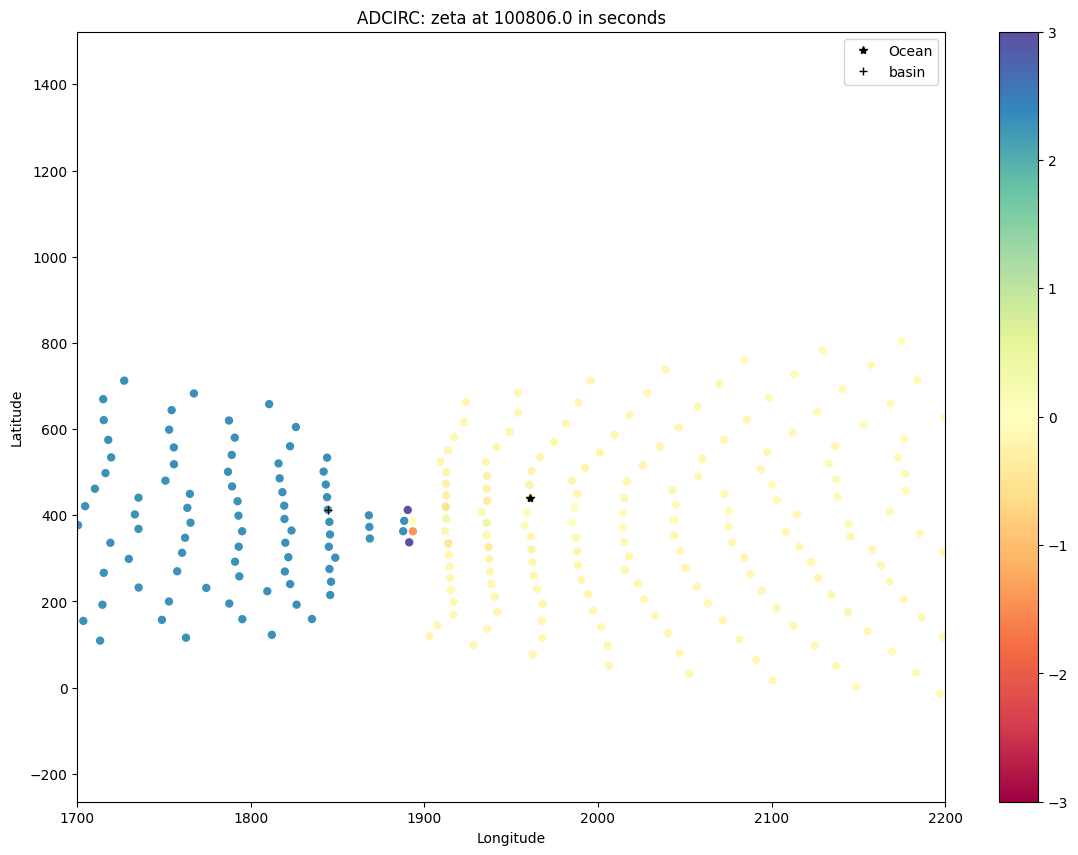

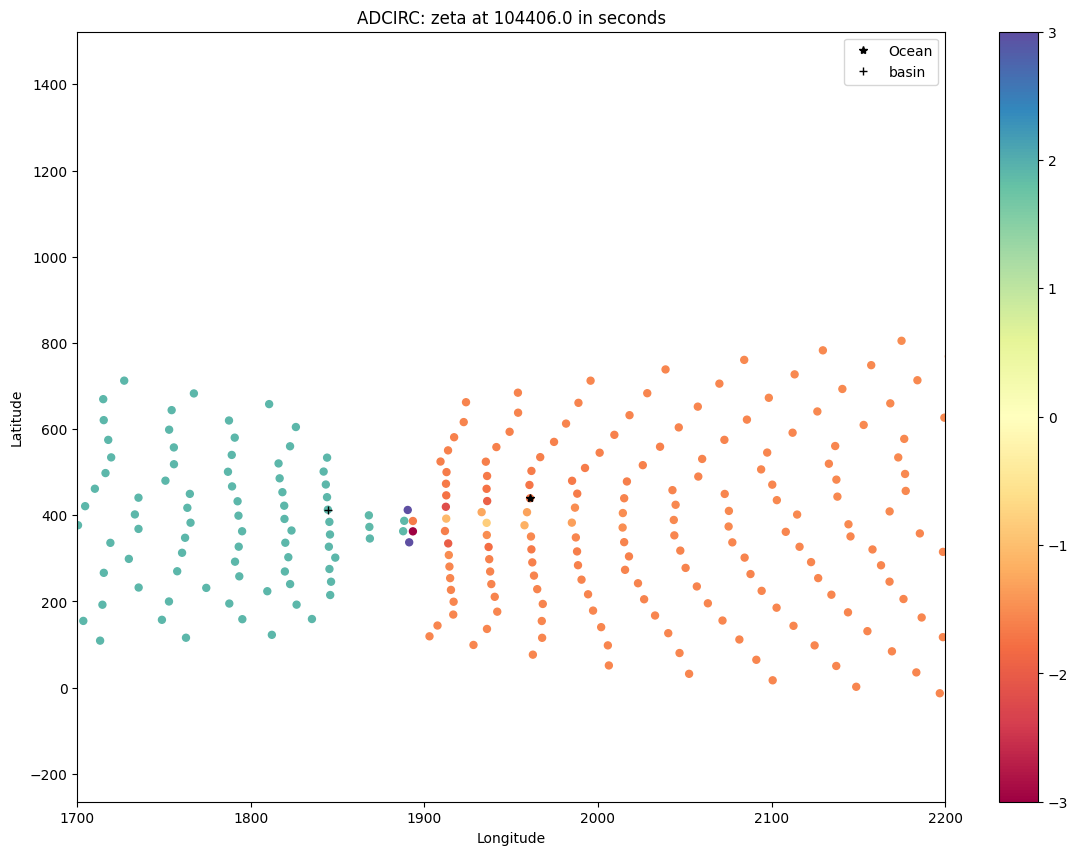

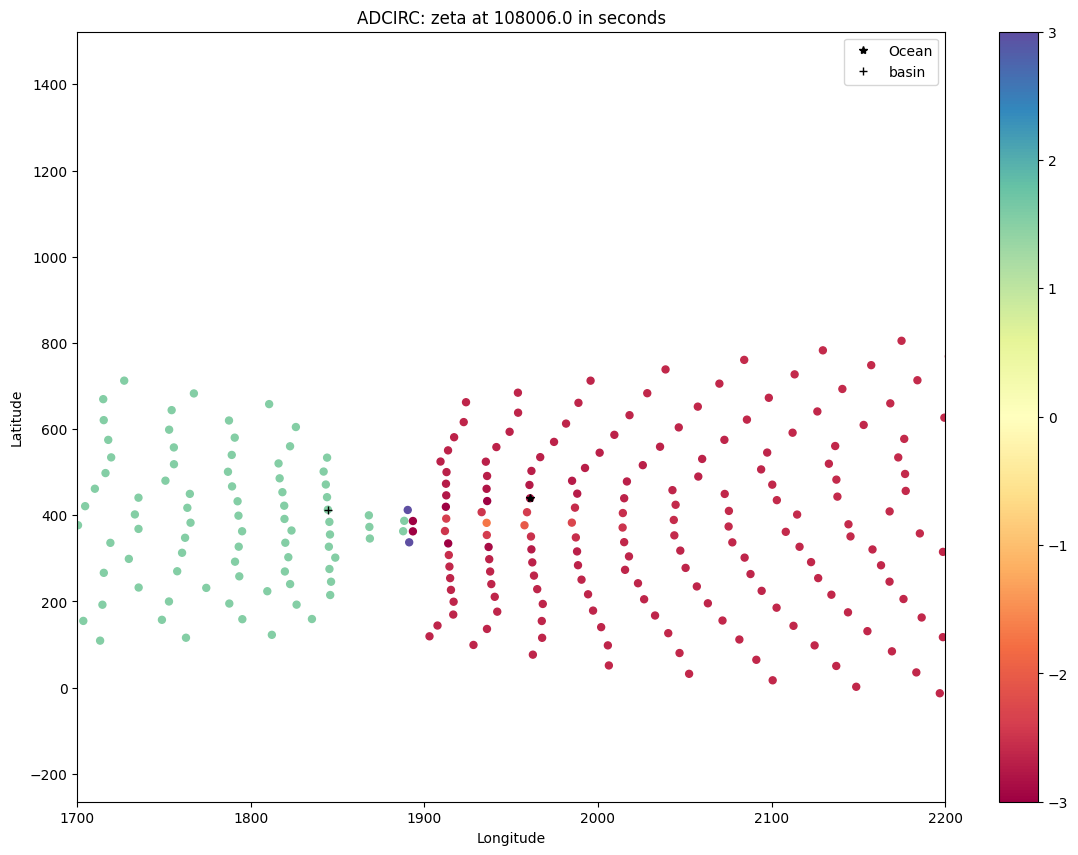

In [6]:
#figure(figsize=(8,8))

# s is markersize  

#dt = 10
dtt = 600
node11 = 747
node22 = 649
count = 0
for i in range(0, nt, dtt):
    var_1d = var[i,:]
    fig = plt.figure(figsize=(14,10))
    count = count+1 
    time = time_1d[i] # Each output at 60 timesteps and model dt is 0.1 seconds 
    plt.scatter(lon, lat, s=100,c=var_1d, cmap='Spectral', marker='.',vmin=-3, vmax=3)
    
    plt.plot(lon[node11],lat[node11],'k*',label='Ocean',markersize=6)
    plt.plot(lon[node22],lat[node22],'k+',label='basin',markersize=6)
# Add labels and title (modify as needed)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.legend()
    plt.colorbar()
    plt.xlim(1700, 2200)

    plt.title(f"ADCIRC: {var_name} at {time} in seconds")

    plt.savefig(f'pngfiles/adcirc_zeta_{count}.png')

    plt.cla

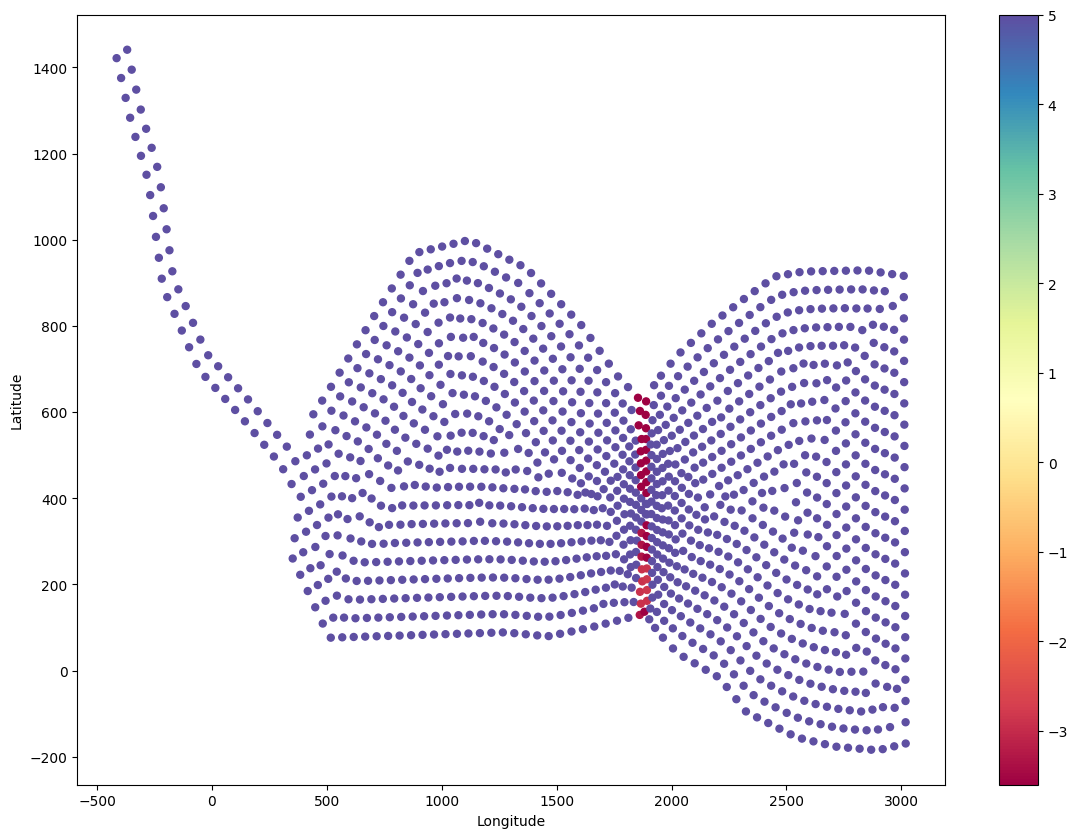

In [7]:
#figure(figsize=(8,8))

# s is markersize  
fig = plt.figure(figsize=(14,10))

time = i*dt*60*0.1 # Each output at 60 timesteps and model dt is 0.1 seconds 
plt.scatter(lon, lat, s=100,c=depth, cmap='Spectral', marker='.')#,vmin=-0.5, vmax=0.5)
# Add labels and title (modify as needed)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar()
#plt.xlim(1500, 2500)
#plt.title(f"ADCIRC: {var_name} at {time} in seconds")

plt.savefig(f'pngfiles/adcirc_depth_zoomout.png')

#plt.cla

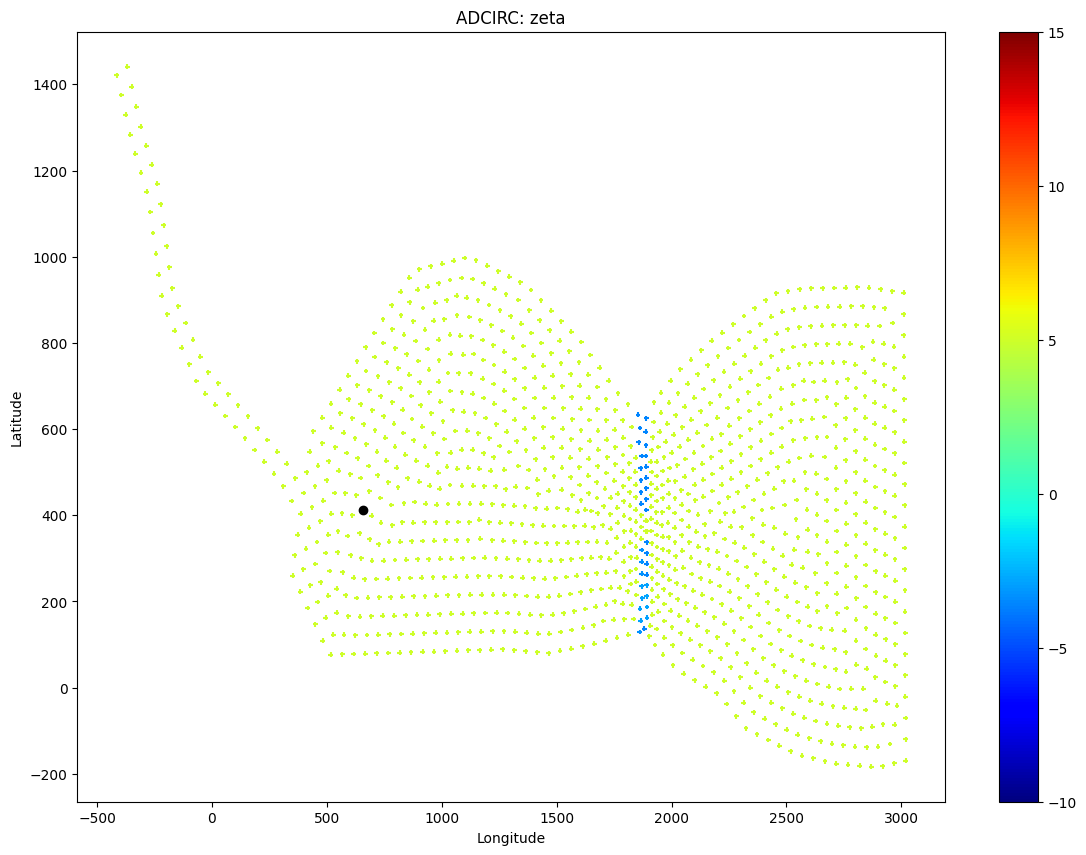

In [8]:
var_1d = var[12,:]
#figure(figsize=(8,8))
fig = plt.figure(figsize=(14,10))

node1= 110
# Create the pcolor mesh
# Marker size (adjust as desired)
marker_size = 100  # Adjust this value to change marker size

# Create the plot
#plt.plot(x, y, marker='o', markersize=marker_size, linestyle='None')  # Adjust marker and linestyle
#s=size
plt.scatter(lon, lat, s=12,c=depth, cmap='jet', marker='+',vmin= -10, vmax=15)
plt.plot(lon[node1],lat[node1],'ko')
#plt.scatter(  x=lon
#    y=lat,
#    s=PST1,c=PST1, cmap='viridis',vmin=0.0, vmax=2.5)

# Add labels and title (modify as needed)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar()
#plt.ylim(15000, 22000)
#plt.xlim(20000, 30000)
plt.title(f"ADCIRC: {var_name}")
plt.show()
